## Import Packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

from collections import Counter

## Load Data Sets

In [2]:
# Loading data sets
train_data = pd.read_csv("..\\Data\\Raw Data\\train.csv")
raw_train_data = pd.read_csv("..\\Data\\Raw Data\\train.csv")
test_data = pd.read_csv("..\\Data\\Raw Data\\test.csv")
raw_test_data = pd.read_csv("..\\Data\\Raw Data\\test.csv")

In [3]:
# Checking to make sure data set loaded properly
train_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
test_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


## Column Names and Descriptions (Attached with data set)

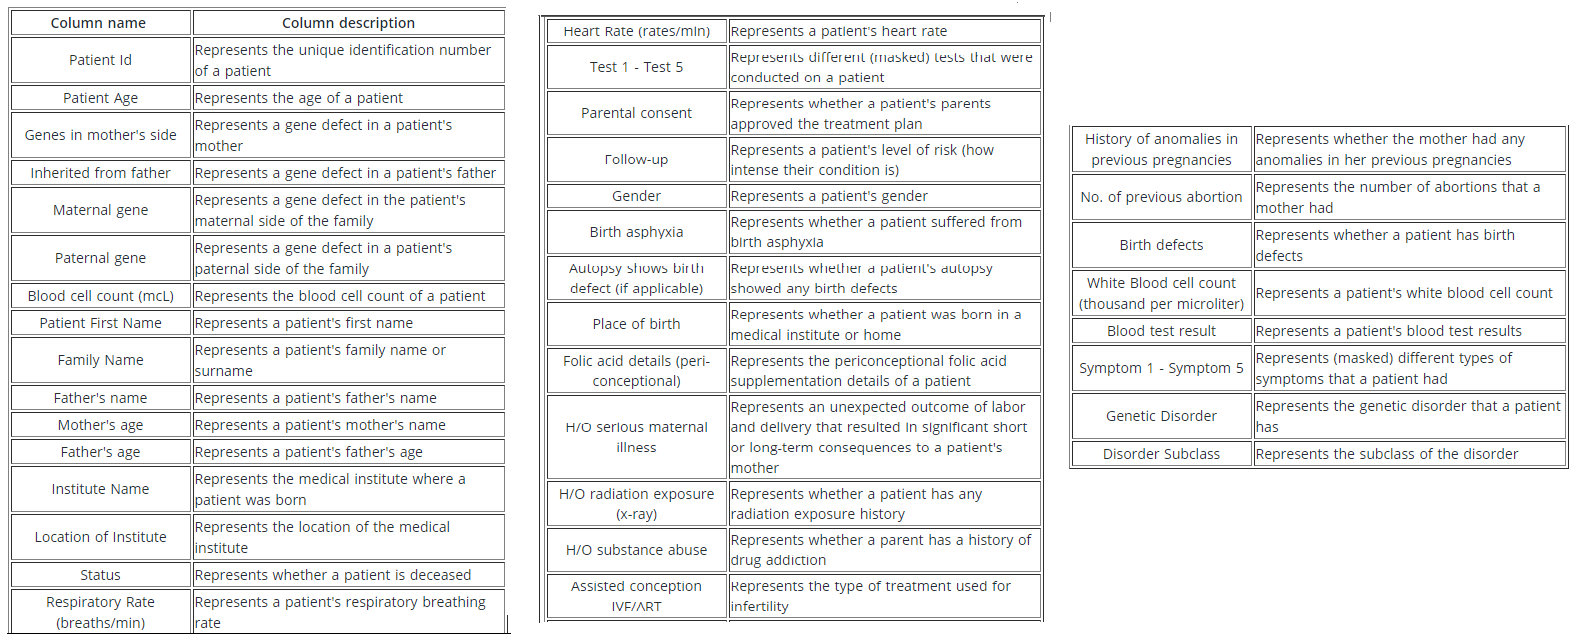

## Evaluation of Train Data Set

Since I will be training my model based on the training data set, I will be focusing my data exploration on the train_data set. Any data clean up applied and moved foward in the train_data can be applied to the test_data, so my model can be used on the test_data set with the same parameters.

In [5]:
# Identify all the columns
train_data.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

First I need to clean up the column names so they are readable and consistent for future processing.

In [6]:
new_col_name = {"Patient Id" : "Patient_Id",
                            "Patient Age" : "Patient_Age",
                            "Genes in mother's side" : "Mother_Gene",
                            "Inherited from father" : "Father_Gene",
                            "Maternal gene" : "Maternal_Gene",
                            "Paternal gene" : "Paternal_Gene",
                            "Blood cell count (mcL)" : "Blood_Cell",
                            "Patient First Name" : "Patient_Name",
                            "Family Name" : "Family_Name",
                            "Father's name" : "Father_Name",
                            "Mother's age" : "Mother_Age",
                            "Father's age" : "Father_Age",
                            "Institute Name" : "Institute_Name",
                            "Location of Institute" : "Institute_Location",
                            "Respiratory Rate (breaths/min)" : "Respiratory_Rate",
                            "Heart Rate (rates/min" : "Heart_Rate",
                            "Test 1" : "Test_1",
                            "Test 2" : "Test_2",
                            "Test 3" : "Test_3",
                            "Test 4" : "Test_4",
                            "Test 5" : "Test_5",
                            "Parental consent" : "Parental_Consent",
                            "Follow-up" : "Follow_Up",
                            "Birth asphyxia" : "Birth_Asphyxia",
                            "Autopsy shows birth defect (if applicable)" : "Autopsy_Birth_Defect",
                            "Place of birth" : "Birth_Place",
                            "Folic acid details (peri-conceptional)" : "Folic_Acid_Details",
                            "H/O serious maternal illness" : "Maternal_Illness",
                            "H/O radiation exposure (x-ray)" : "Radiation_Exposure",
                            "H/O substance abuse" : "Substance_Abuse",
                            "Assisted conception IVF/ART" : "Assisted_Conception",
                            "History of anomalies in previous pregnancies" : "History_Pregnancies",
                            "No. of previous abortion" : "Previous_Abortions",
                            "Birth defects" : "Birth_Defects",
                            "White Blood cell count (thousand per microliter)" : "White_Blood_Cell",
                            "Blood test result" : "Blood_Test",
                            "Symptom 1" : "Symptom_1",
                            "Symptom 2" : "Symptom_2",
                            "Symptom 3" : "Symptom_3",
                            "Symptom 4" : "Symptom_4",
                            "Symptom 5" : "Symptom_5",
                            "Genetic Disorder" : "Genetic_Disorder",
                            "Disorder Subclass" : "Disorder_Subclass"}

train_data.rename(columns=new_col_name, inplace=True)

# Also apply to test_data
test_data.rename(columns=new_col_name, inplace=True)

In [7]:
# Check to see column names have been changed
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Mother_Gene', 'Father_Gene',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell', 'Patient_Name',
       'Family_Name', 'Father_Name', 'Mother_Age', 'Father_Age',
       'Institute_Name', 'Institute_Location', 'Status', 'Respiratory_Rate',
       'Heart_Rate', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid_Details',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Pregnancies', 'Previous_Abortions',
       'Birth_Defects', 'White_Blood_Cell', 'Blood_Test', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [8]:
test_data.columns

Index(['Patient_Id', 'Patient_Age', 'Mother_Gene', 'Father_Gene',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell', 'Patient_Name',
       'Family_Name', 'Father_Name', 'Mother_Age', 'Father_Age',
       'Institute_Name', 'Institute_Location', 'Status', 'Respiratory_Rate',
       'Heart_Rate', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_Consent', 'Follow_Up', 'Gender', 'Birth_Asphyxia',
       'Autopsy_Birth_Defect', 'Birth_Place', 'Folic_Acid_Details',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Pregnancies', 'Previous_Abortions',
       'Birth_Defects', 'White_Blood_Cell', 'Blood_Test', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

The `Genetic_Disorder` and `Disorder_Subclass` are the two target columns that will need to be identified for the test_data.

In [9]:
# Transposed data set of the first 30 to glance at the dataset
train_data.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Patient_Id,PID0x6418,PID0x25d5,PID0x4a82,PID0x4ac8,PID0x1bf7,PID0x44fe,PID0x28de,PID0x4f8f,PID0x8ce3,PID0x8660,...,PID0x5560,PID0x71fc,PID0x3b21,PID0x5029,PID0x5c9f,PID0x42c5,PID0x2de,PID0x2db9,PID0x2df9,PID0x8c46
Patient_Age,2.0,4.0,6.0,12.0,11.0,14.0,3.0,3.0,11.0,4.0,...,2.0,10.0,NaN,4.0,5.0,13.0,NaN,11.0,NaN,4.0
Mother_Gene,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No
Father_Gene,No,Yes,No,No,No,No,No,No,No,Yes,...,No,Yes,No,Yes,Yes,No,No,Yes,No,No
Maternal_Gene,Yes,No,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,NaN,NaN,No,No,Yes
Paternal_Gene,No,No,No,No,Yes,No,Yes,Yes,No,Yes,...,No,No,No,No,Yes,No,Yes,No,No,No
Blood_Cell,4.760603,4.910669,4.893297,4.70528,4.720703,5.103188,4.90108,4.964816,5.209058,4.752272,...,4.808872,5.07772,4.998895,4.96348,4.661035,4.854488,4.710696,5.117909,4.991328,4.658102
Patient_Name,Richard,Mike,Kimberly,Jeffery,Johanna,Richard,Mary,Emma,Willie,John,...,Patricia,Dorothy,Vennie,Willard,Jeffrey,Richard,Mary,Felecia,Dean,Nathan
Family_Name,NaN,NaN,NaN,Hoelscher,Stutzman,NaN,NaN,Bryant,Camacho,Sandoval,...,Robinson,Somogyi,Pang,NaN,NaN,NaN,NaN,NaN,Olsen,Sanchez
Father_Name,Larre,Brycen,Nashon,Aayaan,Suave,Coleston,Aydun,Keng,Tr,Gregori,...,Aidrian,Herber,Khriz,Wilburn,River,Divij,Alyjah,Hung,Neyo,Aydann


In [10]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Id            22083 non-null  object 
 1   Patient_Age           20656 non-null  float64
 2   Mother_Gene           22083 non-null  object 
 3   Father_Gene           21777 non-null  object 
 4   Maternal_Gene         19273 non-null  object 
 5   Paternal_Gene         22083 non-null  object 
 6   Blood_Cell            22083 non-null  float64
 7   Patient_Name          22083 non-null  object 
 8   Family_Name           12392 non-null  object 
 9   Father_Name           22083 non-null  object 
 10  Mother_Age            16047 non-null  float64
 11  Father_Age            16097 non-null  float64
 12  Institute_Name        16977 non-null  object 
 13  Institute_Location    22083 non-null  object 
 14  Status                22083 non-null  object 
 15  Respiratory_Rate   

## Missing Data

In [11]:
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Family_Name,9691,43.884436
Mother_Age,6036,27.333243
Father_Age,5986,27.106824
Institute_Name,5106,23.121858
Maternal_Gene,2810,12.724720
Symptom_2,2222,10.062039
Substance_Abuse,2195,9.939773
Gender,2173,9.840149
History_Pregnancies,2172,9.835620
Test_5,2170,9.826563


It looks like `Family_Name`, `Mother_Age`, `Father_Age`, and `Institute_Name` have more than 20% missing data. But looking back at the head view of the entire dataset, to see if there was a comparision between `Institue_Name` and `Institue_Location`, `Institue_Location` also had missing data, but as a "-". This quick summary of `.isnull()` does not catch these kinds of null notations. Going through the head data again, there are different kinds of null values not caught in the other columns, so I will need to go through the data to set null values appropriately. There are also some missing values for the target columns `Genetic_Disorder` and `Disorder_Subclass` as well.

## Dropping initial uncessary columns

In [12]:
train_data.Patient_Id.value_counts()

PID0x6418    1
PID0x41cf    1
PID0x5b6c    1
PID0x42a8    1
PID0x869f    1
            ..
PID0x11ec    1
PID0x4737    1
PID0x8a5b    1
PID0x33b2    1
PID0x9332    1
Name: Patient_Id, Length: 22083, dtype: int64

There are only unique `Patient_Id`. Moving foward, based on context and column description, `Patient_Id`, `Patient_Name`, `Family_Name`, and `Father_Name` do not provide any meaningful correlations. So I dropped these columns early.

In [13]:
train_data.drop(columns=["Patient_Id", "Patient_Name", "Family_Name", "Father_Name"], inplace=True)

# Applied to test_data
test_data.drop(columns=["Patient_Id", "Patient_Name", "Family_Name", "Father_Name"], inplace=True)

In [14]:
train_data.shape

(22083, 41)

### Checking Each Column for Valid Values

In [15]:
# Running list to collect all null type values to be replaced with NaN
nullList = []

In [16]:
# Generates all unique values and checks if its a python null/NaN value, with nan True sorted to top

def valid_check(col):
    unique_val = train_data[col].unique()
    null_val = pd.isnull(unique_val)
    return sorted(list(zip(unique_val, null_val)), key=lambda x: x[1], reverse=True)

#### Patient_Age

In [17]:
valid_check("Patient_Age")

[(nan, True),
 (2.0, False),
 (4.0, False),
 (6.0, False),
 (12.0, False),
 (11.0, False),
 (14.0, False),
 (3.0, False),
 (7.0, False),
 (1.0, False),
 (0.0, False),
 (10.0, False),
 (5.0, False),
 (13.0, False),
 (8.0, False),
 (9.0, False)]

Valid `nan` null value, rest are actual values.

#### Mother_Gene

In [18]:
valid_check("Mother_Gene")

[('Yes', False), ('No', False)]

No null values.

#### Father_Gene

In [19]:
valid_check("Father_Gene")

[(nan, True), ('No', False), ('Yes', False)]

Valid `nan`.

#### Maternal_Gene

In [20]:
valid_check("Maternal_Gene")

[(nan, True), ('Yes', False), ('No', False)]

Valid `nan`.

#### Paternal_Gene

In [21]:
valid_check("Paternal_Gene")

[('No', False), ('Yes', False)]

#### Blood_Cell

In [22]:
valid_check("Blood_Cell")

[(4.760603085632425, False),
 (4.910669059571037, False),
 (4.8932974275730095, False),
 (4.705280392049416, False),
 (4.720702714375907, False),
 (5.1031884409228745, False),
 (4.901079650369585, False),
 (4.964816114066661, False),
 (5.20905799917528, False),
 (4.752271706141302, False),
 (4.750824479564964, False),
 (4.848794611734611, False),
 (4.612265043442273, False),
 (4.807778109357083, False),
 (4.6204199246334365, False),
 (4.918570062585027, False),
 (4.798520070262021, False),
 (4.952457287335472, False),
 (4.751452120063155, False),
 (4.876895547860267, False),
 (4.808872290486695, False),
 (5.077720293131356, False),
 (4.998895026027557, False),
 (4.963480373730291, False),
 (4.661035080134781, False),
 (4.854488002617106, False),
 (4.710695789049423, False),
 (5.117909242693312, False),
 (4.991327940186166, False),
 (4.6581024100571815, False),
 (4.839043871276557, False),
 (4.7208766426050985, False),
 (4.969060039438289, False),
 (4.353192513704975, False),
 (5.149614

Too many values to sort through, so I performed a quick forward and reverse sort to find anything that is not a num value and also checked for any null values.

In [23]:
print(sorted(train_data['Blood_Cell'].unique()[:5]))
print(sorted(train_data['Blood_Cell'].unique(), reverse=True)[:5])
print(pd.isnull(train_data['Blood_Cell'].unique()).sum())

[4.705280392049416, 4.720702714375907, 4.760603085632425, 4.8932974275730095, 4.910669059571037]
[5.609828970497519, 5.592450706685568, 5.574096671916534, 5.571966474611636, 5.5699020743329966]
0


No issues within this column.

#### Mother_Age

In [24]:
valid_check("Mother_Age")

[(nan, True),
 (41.0, False),
 (21.0, False),
 (32.0, False),
 (40.0, False),
 (45.0, False),
 (44.0, False),
 (50.0, False),
 (28.0, False),
 (30.0, False),
 (24.0, False),
 (36.0, False),
 (51.0, False),
 (23.0, False),
 (49.0, False),
 (46.0, False),
 (18.0, False),
 (38.0, False),
 (37.0, False),
 (42.0, False),
 (48.0, False),
 (25.0, False),
 (19.0, False),
 (47.0, False),
 (34.0, False),
 (35.0, False),
 (22.0, False),
 (33.0, False),
 (20.0, False),
 (26.0, False),
 (31.0, False),
 (29.0, False),
 (27.0, False),
 (43.0, False),
 (39.0, False)]

#### Father_Age

In [25]:
valid_check("Father_Age")

[(nan, True),
 (23.0, False),
 (22.0, False),
 (63.0, False),
 (44.0, False),
 (42.0, False),
 (56.0, False),
 (20.0, False),
 (24.0, False),
 (57.0, False),
 (48.0, False),
 (30.0, False),
 (55.0, False),
 (62.0, False),
 (43.0, False),
 (32.0, False),
 (41.0, False),
 (52.0, False),
 (28.0, False),
 (31.0, False),
 (61.0, False),
 (35.0, False),
 (49.0, False),
 (50.0, False),
 (29.0, False),
 (64.0, False),
 (39.0, False),
 (34.0, False),
 (51.0, False),
 (25.0, False),
 (60.0, False),
 (53.0, False),
 (58.0, False),
 (26.0, False),
 (27.0, False),
 (59.0, False),
 (47.0, False),
 (38.0, False),
 (54.0, False),
 (21.0, False),
 (37.0, False),
 (36.0, False),
 (33.0, False),
 (46.0, False),
 (40.0, False),
 (45.0, False)]

#### Institute_Name

In [26]:
valid_check("Institute_Name")

[(nan, True),
 ('Boston Specialty & Rehabilitation Hospital', False),
 ("St. Margaret's Hospital For Women", False),
 ('Carney Hospital', False),
 ('Massachusetts General Hospital', False),
 ('Not applicable', False),
 ('Lemuel Shattuck Hospital', False),
 ('Shriners Burns Institute', False),
 ('New England Medical Center', False),
 ('Massachusetts Eye & Ear Infirmary', False),
 ('VA Hospital', False),
 ('Dana-farber Cancer Institute', False),
 ('Jewish Memorial Hospital', False),
 ('Beth Israel Deaconess Medical Center West Cam', False),
 ("Children's Hospital", False),
 ('Kindred Hospital', False),
 ('Boston Medical Center', False),
 ('New England Baptist Hospital', False),
 ("Franciscan Children's  Hospital", False),
 ('Beth Israel Deaconess Medical Center East Cam', False),
 ('Boston City Hospital', False),
 ("Brigham And Women's Hospital", False),
 ('Arbour Hospital', False),
 ('Faulkner Hospital', False),
 ('Hebrew Rehabilitation Center', False),
 ("St. Elizabeth's Hospital", Fal

In [27]:
nullList.append("Not applicable")

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my `nullList`.

#### Institute_Location

In [28]:
valid_check("Institute_Location")

[('55 FRUIT ST\nCENTRAL, MA 02114\n(42.36247485742686, -71.06924724545246)',
  False),
 ('1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 02135\n(42.34665771451756, -71.14136122385321)',
  False),
 ('-', False),
 ('300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42.337592548462226, -71.10472284437952)',
  False),
 ('125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789068138, -71.06564730220646)',
  False),
 ('1200 Centre St\nRoslindale, MA 02131\n(42.29738386053219, -71.13150465441208)',
  False),
 ('125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)',
  False),
 ('44 BINNEY ST\nFENWAY/KENMORE, MA 02115\n(42.33734993862189, -71.1071702648531)',
  False),
 ('249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912172521, -71.08168028446168)',
  False),
 ('49 ROBINWOOD AV\nJAMAICA PLAIN, MA 02130\n(42.31617666213941, -71.11272670363542)',
  False),
 ('818 HARRISON AV\nSOUTH END, MA 02118\n(42.335925371008436, -71.07378404269969)',
  False),
 ('90 CUSHING AV\nDORCHESTER, MA 0212

In [29]:
nullList.append("-")

I can see from the list that there is `-`, which can be considered null. So I add it to my `nullList`.

#### Status

In [30]:
valid_check("Status")

[('Alive', False), ('Deceased', False)]

#### Respiratory_Rate

In [31]:
valid_check("Respiratory_Rate")

[(nan, True), ('Normal (30-60)', False), ('Tachypnea', False)]

#### Heart_Rate

In [32]:
valid_check("Heart_Rate")

[(nan, True), ('Normal', False), ('Tachycardia', False)]

#### Test_1 - Test_5

In [33]:
print(valid_check("Test_1"))
print(valid_check("Test_2"))
print(valid_check("Test_3"))
print(valid_check("Test_4"))
print(valid_check("Test_5"))

[(nan, True), (0.0, False)]
[(nan, True), (0.0, False)]
[(nan, True), (0.0, False)]
[(nan, True), (1.0, False)]
[(nan, True), (0.0, False)]


#### Parental_Consent

In [34]:
valid_check("Parental_Consent")

[(nan, True), ('Yes', False)]

#### Follow_Up

In [35]:
valid_check("Follow_Up")

[(nan, True), ('High', False), ('Low', False)]

#### Gender

In [36]:
valid_check("Gender")

[(nan, True), ('Male', False), ('Female', False), ('Ambiguous', False)]

In [37]:
nullList.append("Ambiguous")

I can see from the list that there is `Ambiguous`, which can be considered null. So I add it to my `nullList`.

#### Birth_Asphyxia

In [38]:
valid_check("Birth_Asphyxia")

[(nan, True),
 ('No', False),
 ('No record', False),
 ('Not available', False),
 ('Yes', False)]

In [39]:
nullList.append("No record")
nullList.append("Not available")

I can see from the list that there is `No record`, `Not available`, which can be considered null. So I add it to my nullList.

#### Autopsy_Birth_Defect

In [40]:
valid_check("Autopsy_Birth_Defect")

[(nan, True),
 ('Not applicable', False),
 ('None', False),
 ('No', False),
 ('Yes', False)]

In [41]:
train_data["Autopsy_Birth_Defect"].replace("None", "No", inplace=True)

I can see from the list that there is `Not applicable`, which can be considered null. So I add it to my nullList.
But I also see `None`, which is the same as `No`, but currently divides the data between the two. Thus I replaced `None` to be `No`.

#### Birth_Place

In [42]:
valid_check("Birth_Place")

[(nan, True), ('Institute', False), ('Home', False)]

#### Folic_Acid_Details

In [43]:
valid_check("Folic_Acid_Details")

[(nan, True), ('No', False), ('Yes', False)]

#### Maternal_Illness

In [44]:
valid_check("Maternal_Illness")

[(nan, True), ('Yes', False), ('No', False)]

#### Radiation_Exposure

In [45]:
valid_check("Radiation_Exposure")

[(nan, True),
 ('No', False),
 ('Not applicable', False),
 ('Yes', False),
 ('-', False)]

I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Substance_Abuse

In [46]:
valid_check("Substance_Abuse")

[(nan, True),
 ('No', False),
 ('Not applicable', False),
 ('-', False),
 ('Yes', False)]

I can see from the list that there is `Not applicable` and `-`, which can be considered null. But they are already in my nullList.

#### Assisted_Conception

In [47]:
valid_check("Assisted_Conception")

[(nan, True), ('No', False), ('Yes', False)]

#### History_Pregnancies

In [48]:
valid_check("History_Pregnancies")

[(nan, True), ('Yes', False), ('No', False)]

#### Previous_Abortions

In [49]:
valid_check("Previous_Abortions")

[(nan, True),
 (4.0, False),
 (1.0, False),
 (0.0, False),
 (3.0, False),
 (2.0, False)]

#### Birth_Defects

In [50]:
valid_check("Birth_Defects")

[(nan, True), ('Multiple', False), ('Singular', False)]

#### White_Blood_Cell

In [51]:
valid_check("White_Blood_Cell")

[(nan, True),
 (9.857562482195815, False),
 (5.522559926086473, False),
 (7.919320981493317, False),
 (4.098210272243849, False),
 (10.27223038958957, False),
 (6.825974323855865, False),
 (9.836351500269854, False),
 (6.669552178444405, False),
 (6.397701725889903, False),
 (5.957320885489781, False),
 (8.409691490046477, False),
 (7.995114895176054, False),
 (8.4405926789641, False),
 (3.0, False),
 (10.031078036107456, False),
 (9.382406549695704, False),
 (7.3704773067331875, False),
 (9.566103421294828, False),
 (7.127897885573879, False),
 (8.652478233788548, False),
 (10.312571342519195, False),
 (8.51392164983022, False),
 (11.373536776397165, False),
 (6.872167523839368, False),
 (6.066613929841108, False),
 (9.28247727425534, False),
 (5.091218945888201, False),
 (9.770317209925611, False),
 (12.0, False),
 (9.855420042645004, False),
 (9.032924391710171, False),
 (6.583277316003599, False),
 (4.8290494134754125, False),
 (6.803641065850552, False),
 (10.576283479502203, Fals

In [52]:
print(sorted(train_data['White_Blood_Cell'].unique()[:5]))
print(sorted(train_data['White_Blood_Cell'].unique(), reverse=True)[:5])
print(pd.isnull(train_data['White_Blood_Cell'].unique()).sum())

[4.098210272243849, 5.522559926086473, 7.919320981493317, 9.857562482195815, nan]
[12.0, 11.999857473355384, 11.999652980780064, 11.999292927699544, 11.996706825986776]
1


There is a valid `nan`.

#### Blood_Test

In [53]:
valid_check("Blood_Test")

[(nan, True),
 ('normal', False),
 ('inconclusive', False),
 ('slightly abnormal', False),
 ('abnormal', False)]

In [54]:
nullList.append("inconclusive")

I can see from the list that there is `inconclusive`, which can be considered null. So I add it to my nullList.

#### Symptom_1 - Symptom_5

In [55]:
print(valid_check("Symptom_1"))
print(valid_check("Symptom_2"))
print(valid_check("Symptom_3"))
print(valid_check("Symptom_4"))
print(valid_check("Symptom_5"))

[(nan, True), (1.0, False), (0.0, False)]
[(nan, True), (1.0, False), (0.0, False)]
[(nan, True), (1.0, False), (0.0, False)]
[(nan, True), (1.0, False), (0.0, False)]
[(nan, True), (1.0, False), (0.0, False)]


#### Genetic_Disorder

In [56]:
valid_check("Genetic_Disorder")

[(nan, True),
 ('Mitochondrial genetic inheritance disorders', False),
 ('Multifactorial genetic inheritance disorders', False),
 ('Single-gene inheritance diseases', False)]

#### Disorder_Subclass

In [57]:
valid_check("Disorder_Subclass")

[(nan, True),
 ("Leber's hereditary optic neuropathy", False),
 ('Cystic fibrosis', False),
 ('Diabetes', False),
 ('Leigh syndrome', False),
 ('Cancer', False),
 ('Tay-Sachs', False),
 ('Hemochromatosis', False),
 ('Mitochondrial myopathy', False),
 ("Alzheimer's", False)]

In [58]:
# Check my nullList
nullList

['Not applicable',
 '-',
 'Ambiguous',
 'No record',
 'Not available',
 'inconclusive']

In [59]:
# Apply my nullList to entire data for both my train and test datasets
train_data.replace(nullList, np.NaN, inplace=True)

test_data.replace(nullList, np.NaN, inplace=True)

In [60]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Institute_Name,13546,61.341303
Birth_Asphyxia,12133,54.942716
Autopsy_Birth_Defect,12109,54.834035
Radiation_Exposure,12098,54.784223
Substance_Abuse,12075,54.680071
Institute_Location,10931,49.499615
Gender,8868,40.157587
Blood_Test,7097,32.137844
Mother_Age,6036,27.333243
Father_Age,5986,27.106824


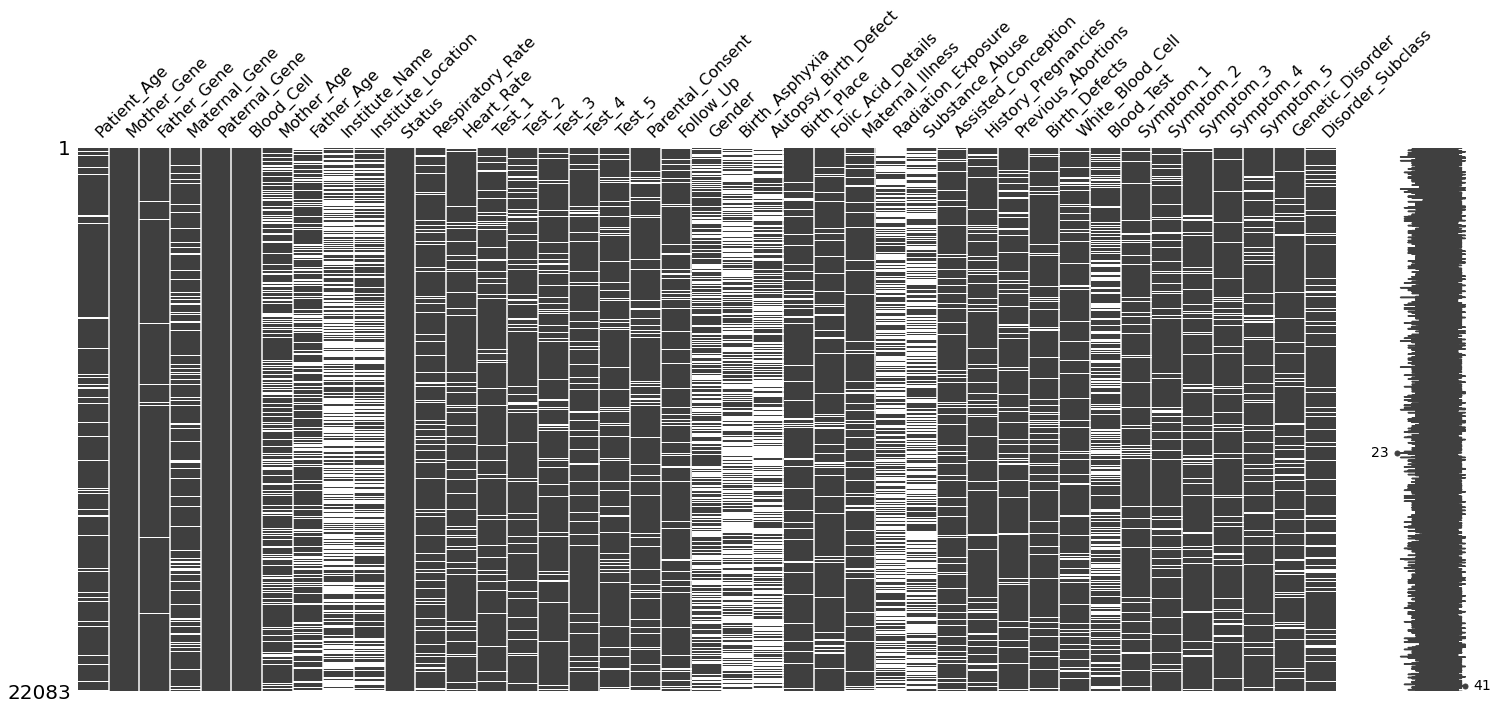

In [61]:
msno.matrix(train_data)
plt.show()

With the identification of all null values, there is a lot more missing data then we initially found out for many of these columns, and even past 50% as well. But we will continue to evaluate the data and come back to how we can handle the missing data.

## Target Columns

Genetic_Disorder                              Disorder_Subclass                  
Mitochondrial genetic inheritance disorders   Leigh syndrome                         4683
                                              Mitochondrial myopathy                 3971
                                              Leber's hereditary optic neuropathy     587
Multifactorial genetic inheritance disorders  Diabetes                               1653
                                              Alzheimer's                             133
                                              Cancer                                   91
Single-gene inheritance diseases              Cystic fibrosis                        3145
                                              Tay-Sachs                              2556
                                              Hemochromatosis                        1228
Name: Disorder_Subclass, dtype: int64


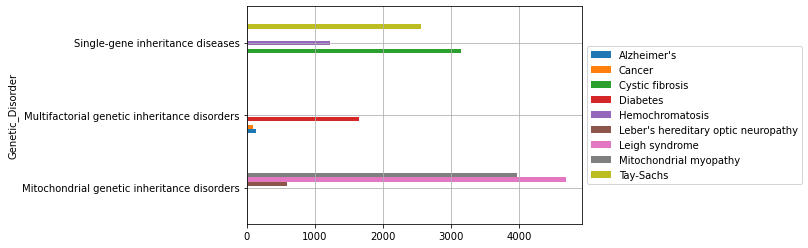

In [62]:
gb = train_data.groupby("Genetic_Disorder")["Disorder_Subclass"].value_counts()
print(gb)

gb.unstack().plot(kind='barh')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

A quick glance at the target columns shows we have varying levels of the amount of data we have on the identified disorders and disorder subclasses. This is something to consider down the line with my models and their probablity to correctly identify patients for these disorders / disorder subclasses. 

## Categorical Features

In [63]:
# Checking the data types and selecting the categorical features
train_data.dtypes

Patient_Age             float64
Mother_Gene              object
Father_Gene              object
Maternal_Gene            object
Paternal_Gene            object
Blood_Cell              float64
Mother_Age              float64
Father_Age              float64
Institute_Name           object
Institute_Location       object
Status                   object
Respiratory_Rate         object
Heart_Rate               object
Test_1                  float64
Test_2                  float64
Test_3                  float64
Test_4                  float64
Test_5                  float64
Parental_Consent         object
Follow_Up                object
Gender                   object
Birth_Asphyxia           object
Autopsy_Birth_Defect     object
Birth_Place              object
Folic_Acid_Details       object
Maternal_Illness         object
Radiation_Exposure       object
Substance_Abuse          object
Assisted_Conception      object
History_Pregnancies      object
Previous_Abortions      float64
Birth_De

In [64]:
# Data is subsetted for catagorical data
# The target columns Genetic_Disorder and Disorder_Subclass are dropped since they have already been reviewed
catData = train_data.select_dtypes('object')
catData.head().T

,0,1,2,3,4
Mother_Gene,Yes,Yes,Yes,Yes,Yes
Father_Gene,No,Yes,No,No,No
Maternal_Gene,Yes,No,No,Yes,NaN
Paternal_Gene,No,No,No,No,Yes
Institute_Name,Boston Specialty & Rehabilitation Hospital,St. Margaret's Hospital For Women,NaN,NaN,Carney Hospital
Institute_Location,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...","1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...","300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42..."
Status,Alive,Deceased,Alive,Deceased,Alive
Respiratory_Rate,Normal (30-60),Tachypnea,Normal (30-60),Tachypnea,Tachypnea
Heart_Rate,Normal,Normal,Tachycardia,Normal,Tachycardia
Parental_Consent,Yes,Yes,Yes,Yes,NaN


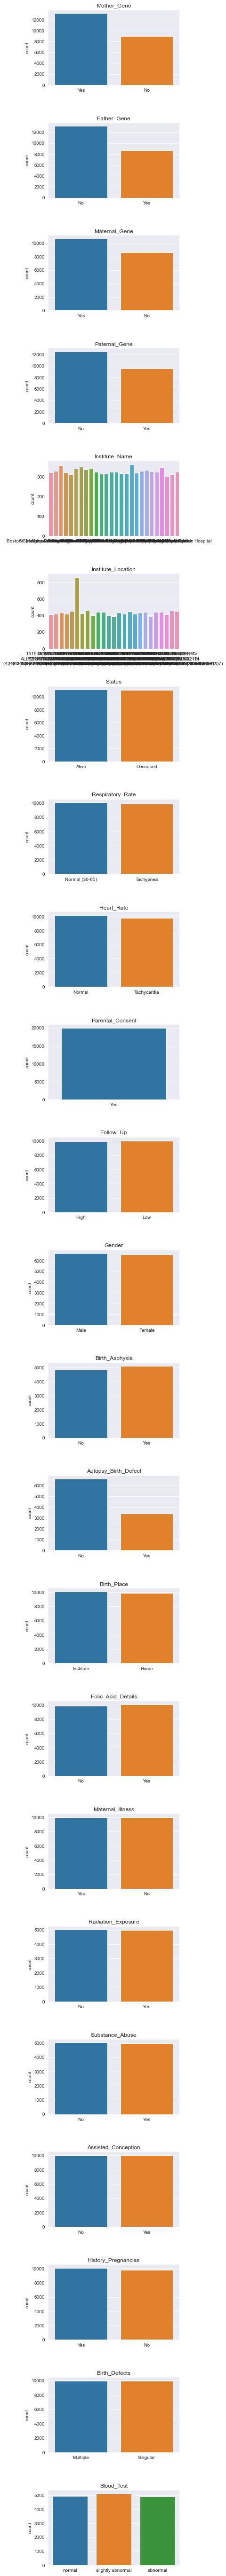

In [65]:
# Categorical Count Data
# Target columns are dropped since they are to be evaluated against
cols = catData.columns.drop(["Genetic_Disorder", "Disorder_Subclass"])

sns.set_style("darkgrid")
fig, ax = plt.subplots(len(cols), figsize = (5,100))

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=catData,
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    
plt.subplots_adjust(hspace = 0.5)

All the columns looks good except for `Institute_Name`, `Institute_Location`, and `Parental_Consent`.
Given that `Parental_Consent` is only one value, I can go ahead and just drop the column since it provides no information.
As for `Institute_Name` and `Institute_Location`, there are a lot of unique values, but I should check if there are any relations between the two columns as well.

In [66]:
train_data.drop("Parental_Consent", axis=1, inplace=True)

# Make sure to apply this to the test data
test_data.drop("Parental_Consent", axis=1, inplace=True)

#### Institute_Name and Institute_Location Evaluation

In [67]:
catData[['Institute_Name', 'Institute_Location']].nunique()

Institute_Name        26
Institute_Location    25
dtype: int64

It looks like there is one more Institute_Name than Institute_Locations.

In [68]:
catData.groupby("Institute_Name")["Institute_Location"].nunique()

Institute_Name
Arbour Hospital                                  25
Beth Israel Deaconess Medical Center East Cam    25
Beth Israel Deaconess Medical Center West Cam    25
Boston City Hospital                             25
Boston Medical Center                            25
Boston Specialty & Rehabilitation Hospital       25
Brigham And Women's Hospital                     25
Carney Hospital                                  25
Children's Hospital                              25
Dana-farber Cancer Institute                     25
Faulkner Hospital                                25
Franciscan Children's  Hospital                  25
Hebrew Rehabilitation Center                     25
Jewish Memorial Hospital                         25
Kindred Hospital                                 25
Lemuel Shattuck Hospital                         25
Massachusetts Eye & Ear Infirmary                25
Massachusetts General Hospital                   25
New England Baptist Hospital                     

Each `Institute_Name` looks to have 25 associated `Institute_Location`.

In [69]:
# Arbitrarily evaluating Arbour Hosptial
Arbour_Hospital_loc = catData.loc[catData["Institute_Name"] == "Arbour Hospital"]["Institute_Location"].unique()
Arbour_Hospital_loc

array(['49 ROBINWOOD AV\nJAMAICA PLAIN, MA 02130\n(42.31617666213941, -71.11272670363542)',
       '243 CHARLES ST\nCENTRAL, MA 02114\n(42.36297141612903, -71.07043169540236)',
       '300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42.337592548462226, -71.10472284437952)',
       '1200 Centre St\nRoslindale, MA 02131\n(42.29738386053219, -71.13150465441208)',
       '249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912172521, -71.08168028446168)',
       '185 PILGRIM RD\nFENWAY/KENMORE, MA 02215\n(42.3385289546495, -71.10940050507557)',
       '59 TOWNSEND ST\nROXBURY, MA 02119\n(42.31856289432221, -71.09165569529381)',
       '125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)',
       '55 FRUIT ST\nCENTRAL, MA 02114\n(42.36247485742686, -71.06924724545246)',
       '2100 DORCHESTER AV\nDORCHESTER, MA 02124\n(42.27854306401838, -71.06631280050811)',
       '88 EAST NEWTON ST\nSOUTH END, MA 02118\n(42.3371094801158, -71.07139912234962)',
       '1153 CENTRE ST

In [70]:
# Arbitrarily evaluating St. Elizabeth's Hospital
St_Elizabeths_Hospital_loc = catData.loc[catData["Institute_Name"] == "St. Elizabeth's Hospital"]["Institute_Location"].unique()
St_Elizabeths_Hospital_loc

array(['30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42.352620000312925, -71.13281000028115)',
       '736 CAMBRIDGE ST\nALLSTON/BRIGHTON, MA 02135\n(42.349656455743144, -71.14822103232248)',
       '51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718561898, -71.0668523937257)',
       '818 HARRISON AV\nSOUTH END, MA 02118\n(42.335925371008436, -71.07378404269969)',
       '44 BINNEY ST\nFENWAY/KENMORE, MA 02115\n(42.33734993862189, -71.1071702648531)',
       '125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)',
       '125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789068138, -71.06564730220646)',
       '1400 VFW Parkway\nWest Roxbury, MA 02132\n(42.27598935537618, -71.17245195460838)',
       '750 WASHINGTON ST\nCENTRAL, MA 02111\n(42.349946522039204, -71.0634111017112)',
       '49 ROBINWOOD AV\nJAMAICA PLAIN, MA 02130\n(42.31617666213941, -71.11272670363542)',
       '75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.33587602903896, -71.10741054246668)',
      

In [71]:
# Checking if there are any difference between these two hosptials
set(Arbour_Hospital_loc) - set(St_Elizabeths_Hospital_loc)

set()

It returns no difference between these two hospitals and their listed locations. A quick google search shows that these two hosptials are located in entirely different areas with Arbour Hosptial located in boston, while St. Elizabeth's Hospital is located in Washington, DC. It is difficult to explore why this is the case without asking the data collectors / database, but given these duplicates between hosptial name and location and its validity, I will drop these two columns.

In [72]:
train_data.drop(columns=["Institute_Name", "Institute_Location"], inplace=True)

# Make sure to apply this to the test_data
test_data.drop(columns=["Institute_Name", "Institute_Location"], inplace=True)

## Numerical Features

In [73]:
# Subsetting for numerical columns
numData = train_data.select_dtypes('float64')

In [74]:
numData.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood_Cell,22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother_Age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father_Age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test_1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test_5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Previous_Abortions,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


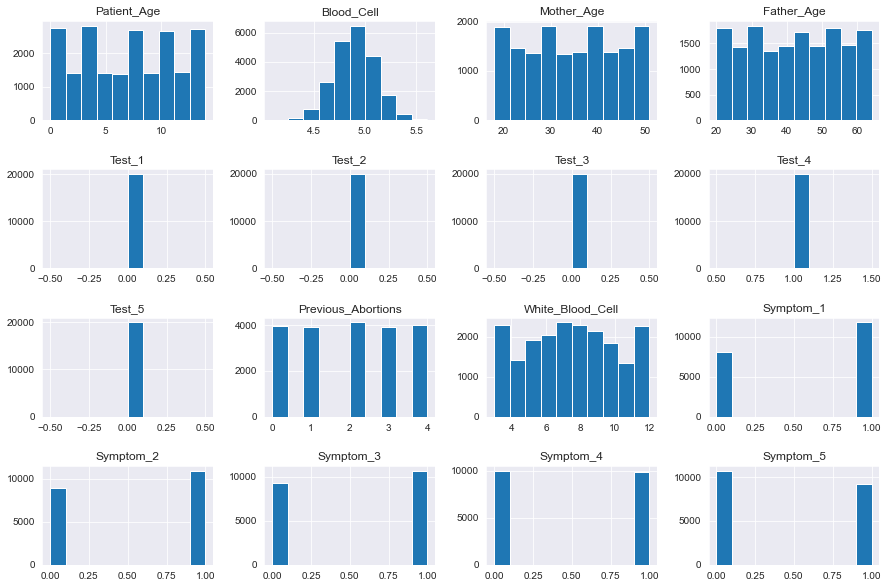

In [75]:
numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

* There are no variation within the Test columns.
* `Previous_Abortions` and the `symptom` columns look to have defined categorical type data. 
* `Patient_Age`, `Blood_Cell`, `Mother_Age`, `Father_Age`, and `White_Blood_Cell` are continuous data.

#### Test Columns

In [76]:
print(numData.Test_1.value_counts())
print(numData.Test_2.value_counts())
print(numData.Test_3.value_counts())
print(numData.Test_4.value_counts())
print(numData.Test_5.value_counts())

0.0    19956
Name: Test_1, dtype: int64
0.0    19931
Name: Test_2, dtype: int64
0.0    19936
Name: Test_3, dtype: int64
1.0    19943
Name: Test_4, dtype: int64
0.0    19913
Name: Test_5, dtype: int64


All of these tests have only 1 value, providing no useful information for investigations. These columns are dropped.

In [77]:
train_data.drop(columns=["Test_1", "Test_2", "Test_3", "Test_4", "Test_5"], inplace=True)

# Applid to test data too
test_data.drop(columns=["Test_1", "Test_2", "Test_3", "Test_4", "Test_5"], inplace=True)

Since the symptoms and previous_abortions columns look more like categorical type data, I decided to take a quick look at them using catagorical grapinh.

#### Symptom Columns

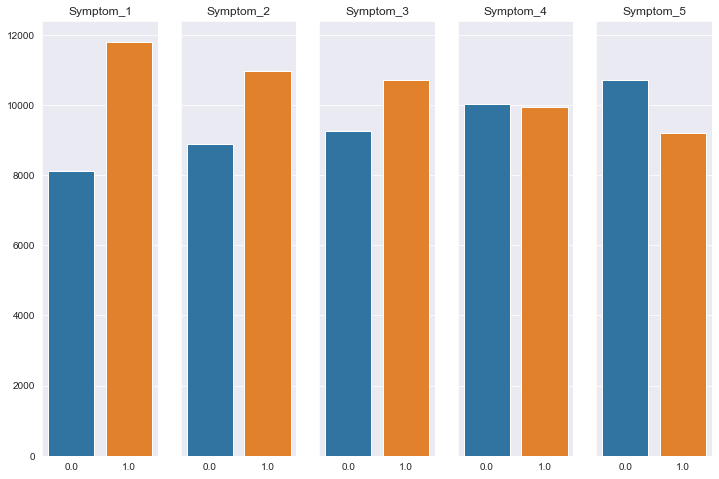

In [78]:
# Categorical Count Data
cols = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"]

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 5, figsize=(12,8), sharey=True)

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=numData,
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend([],[], frameon=False)

#### Previous_Abortions Columns

<AxesSubplot:xlabel='Previous_Abortions', ylabel='count'>

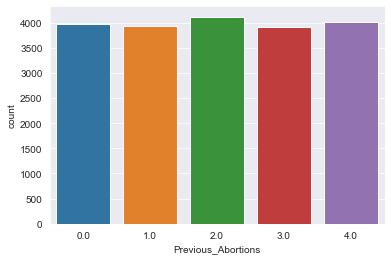

In [79]:
# Categorical Count Data
sns.countplot(x="Previous_Abortions",
              data=numData)

These columns provide clear bins as catagorical data, which may be useful later to investigate and use.

### Combing back to Missing Data

Now that the data has been cleaned up of unnecessary columns, I can come back to view the missing data with what is left in the dataset.

In [80]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Birth_Asphyxia,12133,54.942716
Autopsy_Birth_Defect,12109,54.834035
Radiation_Exposure,12098,54.784223
Substance_Abuse,12075,54.680071
Gender,8868,40.157587
Blood_Test,7097,32.137844
Mother_Age,6036,27.333243
Father_Age,5986,27.106824
Maternal_Gene,2810,12.724720
Symptom_2,2222,10.062039


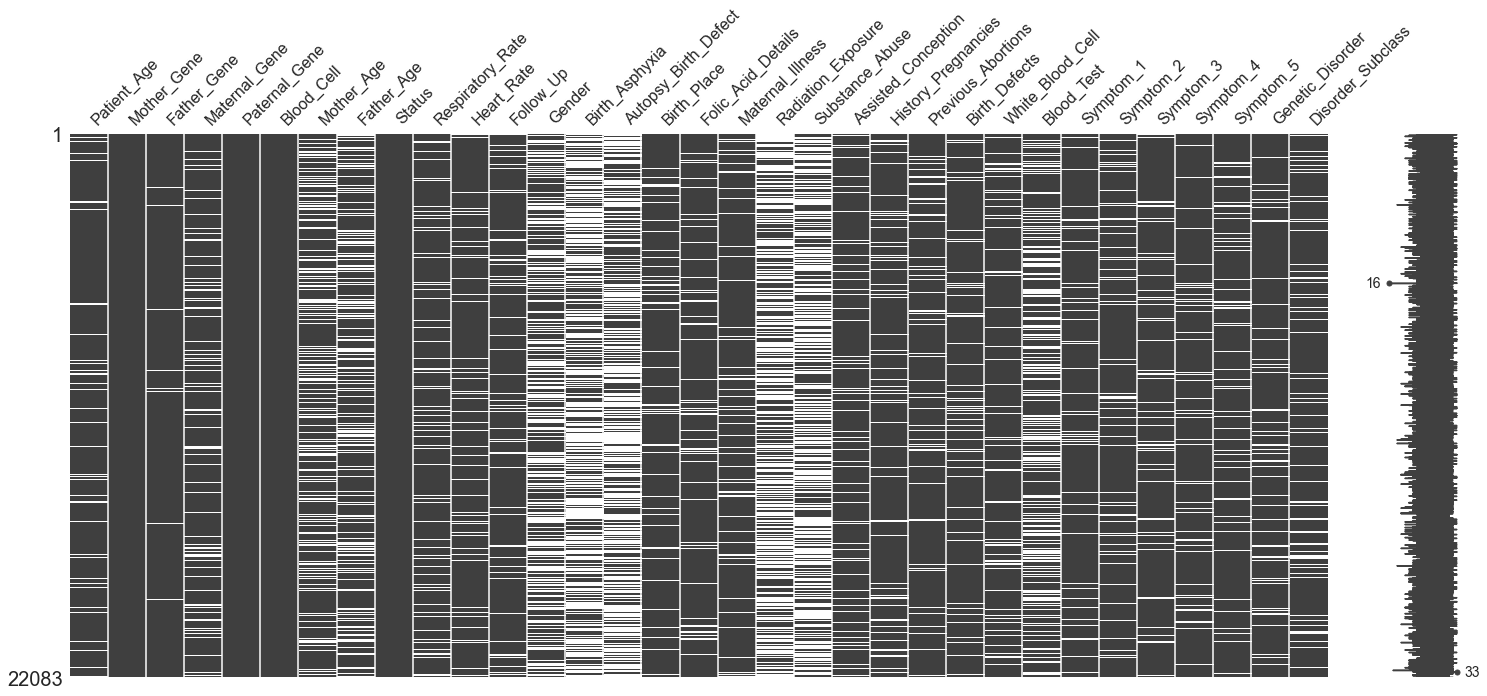

In [81]:
msno.matrix(train_data)
plt.show()

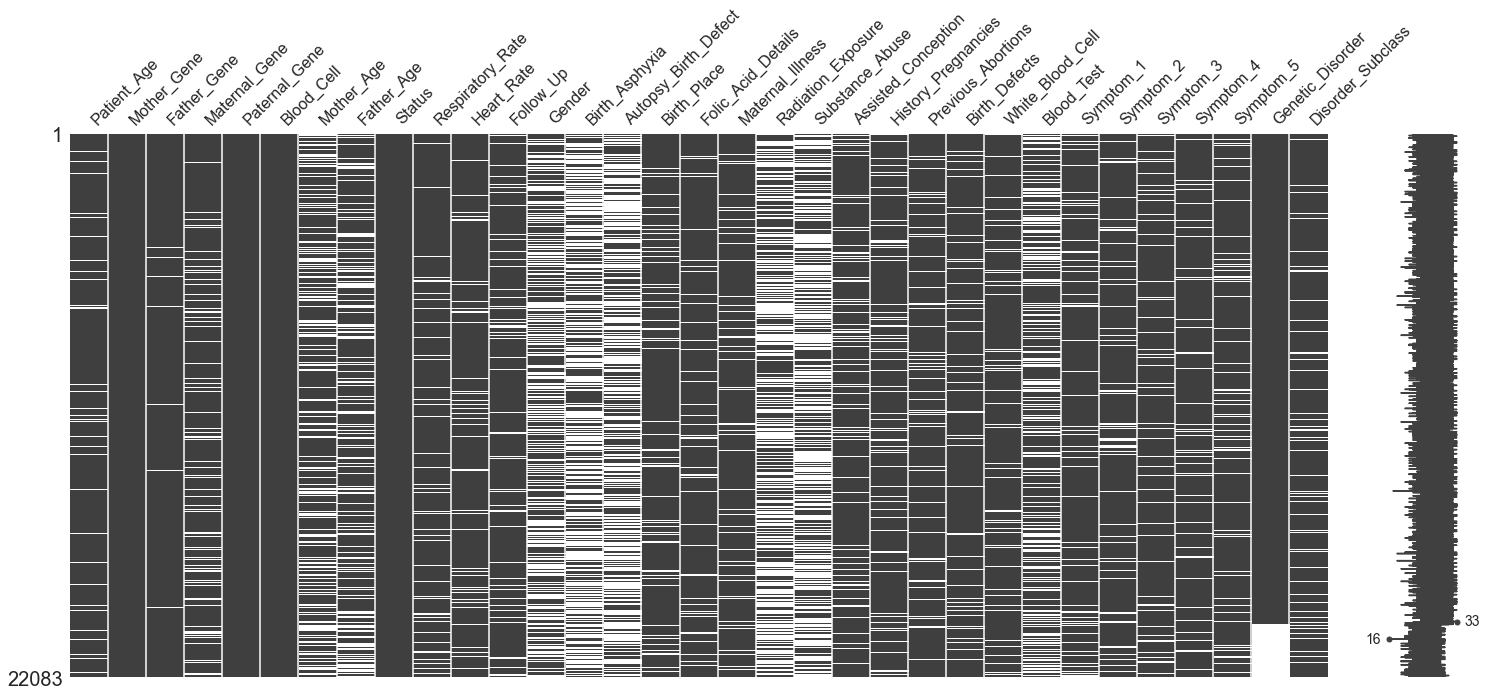

In [82]:
msno.matrix(train_data.sort_values(["Genetic_Disorder"]))
plt.show()

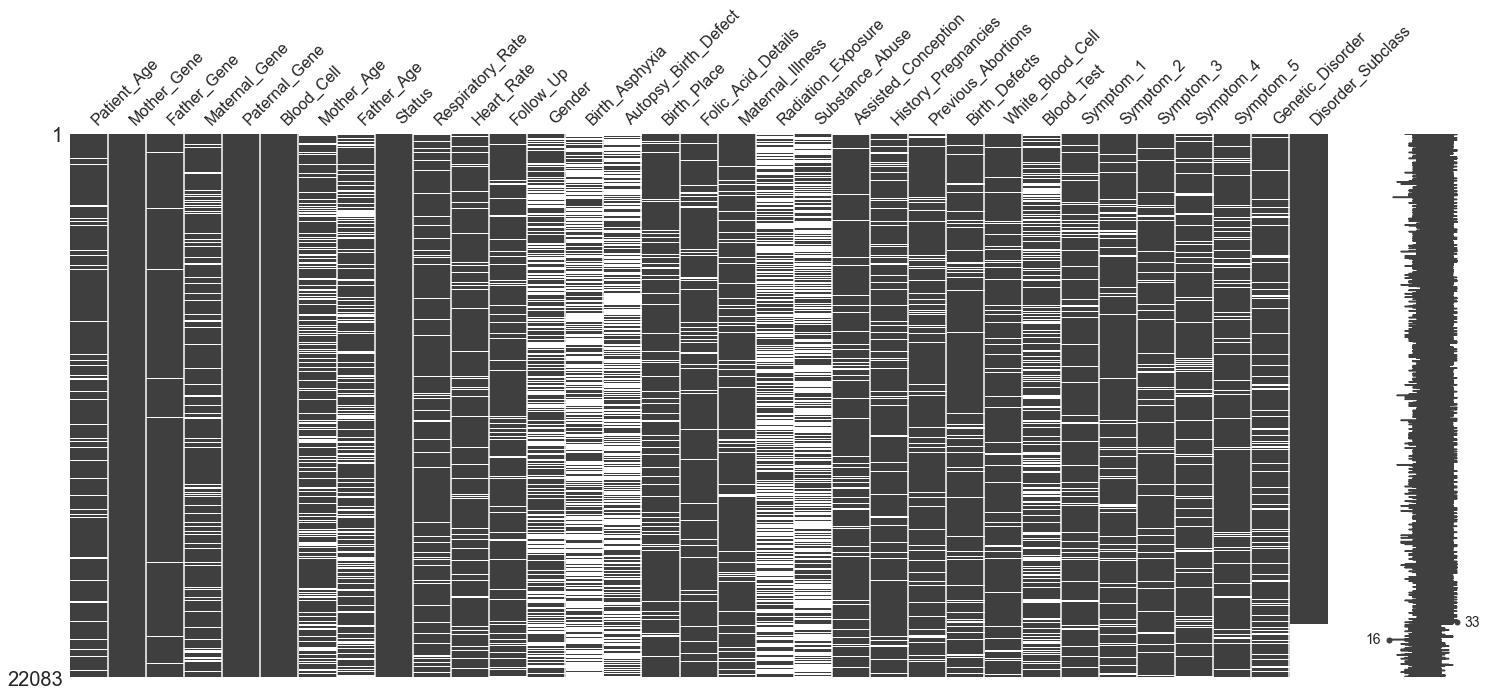

In [83]:
msno.matrix(train_data.sort_values(["Disorder_Subclass"]))
plt.show()

`Birth_Asphyxia`, `Autopsy_Birth_Defect`, `Radiation_Exposure` and `Substance_Abuse` have more than 50% of the data missing with `Gender` missing 40%. This will be something that may need to be dropped after deeper exploration in EDA. Sorting by both the `Genetic_Disorder` and `Disorder_Subclass` does not visually show any distincition of missing values for each group of disorder. 

In [84]:
missing_target_data = train_data[['Disorder_Subclass', 'Genetic_Disorder']].isnull().sum(axis=1)
missing_target_data.value_counts()/len(missing_target_data) * 100

0    81.723498
1    17.017615
2     1.258887
dtype: float64

It looks like 1.26% of the data have both the target columns missing, meaning that these rows of data will be useless in helping the model down the line. So they will need to be dropped.

In [85]:
train_data = train_data[missing_target_data != 2]

### Finalization of Data Wrangling

In [86]:
original_train_data = raw_train_data.rename(columns=new_col_name, inplace=False)
sorted(list(set(original_train_data.columns) - set(train_data.columns)))

['Family_Name',
 'Father_Name',
 'Institute_Location',
 'Institute_Name',
 'Parental_Consent',
 'Patient_Id',
 'Patient_Name',
 'Test_1',
 'Test_2',
 'Test_3',
 'Test_4',
 'Test_5']

In [87]:
train_data.shape

(21805, 33)

In [88]:
test_data.shape

(9465, 31)

I removed a total of 12 columns that provided no information or potential correlations and 278 rows of data points that could not contribute to modeling the two target columns: `Genetic_Disorder` and `Disorder_Subclass`. Both the train_data and test_data have matching columns, except for the missing `Genetic_Disorder` and `Disorder_Subclass` column in the test_data.

### Quick Evaluation of the test_data

In [89]:
test_data.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Patient_Age,6,10,5,13,5,9,4,5,12,3,...,4,8,14,12,14,9,13,6,9,12
Mother_Gene,No,Yes,No,No,No,No,Yes,Yes,No,No,...,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
Father_Gene,Yes,No,NaN,Yes,NaN,No,No,No,Yes,Yes,...,No,No,Yes,No,No,No,Yes,No,No,No
Maternal_Gene,No,NaN,No,Yes,NaN,NaN,NaN,NaN,No,No,...,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes
Paternal_Gene,No,Yes,No,No,Yes,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,Yes,Yes
Blood_Cell,4.981655,5.11889,4.876204,4.687767,5.152362,4.942384,5.113778,4.635096,5.175135,4.778253,...,4.982442,5.024288,4.913517,4.775017,4.933023,5.121327,4.733421,4.36668,4.486934,4.903731
Mother_Age,38,33,48,25,41,27,19,48,37,28,...,33,24,30,39,48,25,28,47,41,39
Father_Age,61,53,60,55,38,25,22,24,51,56,...,36,58,62,43,27,46,61,50,30,24
Status,Alive,Alive,Deceased,Alive,Deceased,Alive,Alive,Alive,Alive,Deceased,...,Alive,Alive,Deceased,Alive,Alive,Deceased,Deceased,Alive,Alive,Alive
Respiratory_Rate,Tachypnea,NaN,NaN,-99,Tachypnea,-99,Normal (30-60),Normal (30-60),Tachypnea,Tachypnea,...,-99,Tachypnea,-99,-99,-99,NaN,-99,Normal (30-60),NaN,Normal (30-60)


I see -99 values spread across the data, which can be translated to null values.

In [90]:
def uniqueChecker(col):
    return test_data[col].unique()

In [91]:
for col in test_data.columns:
    print(uniqueChecker(col))

[ 6 10  5 13  9  4 12  3  1  0 14  8  2 11  7]
['No' 'Yes']
['Yes' 'No' nan]
['No' nan 'Yes']
['No' 'Yes']
[4.98165485 5.11888952 4.87620391 ... 4.89835233 4.80483966 5.42123643]
[38 33 48 25 41 27 19 37 28 39 49 40 22 21 46 24 30 47 20 42 35 36 51 50
 45 34 44 43 32 26 31 18 23 29]
[61 53 60 55 38 25 22 24 51 56 23 48 33 37 45 62 64 36 58 43 27 46 50 30
 40 26 47 44 49 63 39 21 41 29 20 54 31 52 59 57 42 35 28 34 32]
['Alive' 'Deceased']
['Tachypnea' nan '-99' 'Normal (30-60)']
['Normal' '-99' nan 'Tachycardia']
['Low' 'High' '-99']
['Male' nan '-99' 'Female']
['Yes' nan 'No' '-99']
[nan '-99' 'None' 'Yes' 'No']
['Institute' '-99' 'Home']
['Yes' 'No' '-99']
['No' 'Yes' '-99']
['Yes' '-99' nan 'No']
[nan '-99' 'Yes' 'No']
['No' 'Yes' '-99']
['-99' 'Yes' 'No']
[  2 -99   0   1   3   4]
['Multiple' 'Singular' '-99']
[-99.           8.17958359   6.88407127 ...   4.8595362    5.6960619
   7.49276517]
['slightly abnormal' 'normal' '-99' nan 'abnormal']
[ True False]
[ True False]
[ True Fal

It looks like -99 is the only additional null value I will need to convert to python NaN. As well as None in the Autopsy_Birth_Defect to No.

In [92]:
# Convert -99 to NaN
test_data.replace("-99", np.NaN, inplace=True)
test_data.replace(-99, np.NaN, inplace=True)

test_data.replace('None', 'No', inplace=True)

In [93]:
for col in test_data.columns:
    print(col, uniqueChecker(col))

Patient_Age [ 6 10  5 13  9  4 12  3  1  0 14  8  2 11  7]
Mother_Gene ['No' 'Yes']
Father_Gene ['Yes' 'No' nan]
Maternal_Gene ['No' nan 'Yes']
Paternal_Gene ['No' 'Yes']
Blood_Cell [4.98165485 5.11888952 4.87620391 ... 4.89835233 4.80483966 5.42123643]
Mother_Age [38 33 48 25 41 27 19 37 28 39 49 40 22 21 46 24 30 47 20 42 35 36 51 50
 45 34 44 43 32 26 31 18 23 29]
Father_Age [61 53 60 55 38 25 22 24 51 56 23 48 33 37 45 62 64 36 58 43 27 46 50 30
 40 26 47 44 49 63 39 21 41 29 20 54 31 52 59 57 42 35 28 34 32]
Status ['Alive' 'Deceased']
Respiratory_Rate ['Tachypnea' nan 'Normal (30-60)']
Heart_Rate ['Normal' nan 'Tachycardia']
Follow_Up ['Low' 'High' nan]
Gender ['Male' nan 'Female']
Birth_Asphyxia ['Yes' nan 'No']
Autopsy_Birth_Defect [nan 'No' 'Yes']
Birth_Place ['Institute' nan 'Home']
Folic_Acid_Details ['Yes' 'No' nan]
Maternal_Illness ['No' 'Yes' nan]
Radiation_Exposure ['Yes' nan 'No']
Substance_Abuse [nan 'Yes' 'No']
Assisted_Conception ['No' 'Yes' nan]
History_Pregnancies 

Everything looks tidy and is ready for EDA.

In [94]:
# Save cleaned data
train_data.to_csv('../Data/train_data_cleaned.csv')
test_data.to_csv('../Data/test_data_cleaned.csv')